# $3^{rd}$ exercise

## Notebook setup

#### Used libraries

In [8]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

#### Reading and printing config files

In [9]:
#Load and print config files
def LoadConf(path):
    d={}
    with open(path) as file:
        for line in file:
            (directive,key, val) = line.split()
            if(directive=="#define"): d[key] = int(val)
    return d

def PrintConf(d):
    for key, val in d.items(): print("{0:<19}{1}".format(key,val))
        
#Plot shortcuts
def PlotSetup():
    plt.axes().set_facecolor(bg1)
    plt.grid(alpha=0.3)

def MultiplotSetup(fig,r,c):
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        fig.axes[i].set_facecolor(bg1)
        plt.grid(alpha=0.3) 
    
def Legend():
    leg = plt.legend(facecolor=bg2)
    for text in leg.get_texts():
        text.set_color(el1)
        
def Errbar1Sigma(x,y,e):
    plt.vlines(x,y-e,y+e,color=er1,alpha=0.8, label="$1\sigma$")
    plt.plot(x,y,color=el1)
    
def Errbar2Sigma(x,y,e):
    plt.vlines(x,y-e,y+e,color=er1,alpha=0.8, label="$1\sigma$")
    plt.vlines(x,y-2*e,y+2*e,color=er2,alpha=0.4, label="$2\sigma$")
    plt.plot(x,y,color=el1)

#### Colors, just for fun

In [10]:
#background
bg1 = "#191724" 
bg2 = "#26233a" 
#elements
el1 = "#e0def4" 
el2 = "#f6c177" 
el3 = "#eb6f92" 
#errorbars
er1 = "#908caa"  
er2 = "#6e6a86"

## 03.1 - Montecarlo simulation of the european call&put-option prices

### Introductory notes
Options are contracts that give the buyers the right, but not the obligation, to buy or to sell an asset.
First of all, a bit of nomenclature:

| head          | head                      |
|:-------------:|:-------------------------:|
| writer        | Seller of the option      |
| Holder        | Buyer of the option       |
| Strike price  | Price fixed by the option |

European call/put options are option in wich the writer grants the holder the right to buy/sell an asset at the strike price at an expire date in the future.
It's important to evaluate how much an option should cost, based on the asset price at the expire date. In the case of european option, Black-Scholes theory gives an analitic solution to the problem, under the hypothesis that the asset price behaves as a geometric brownian motion $GBM(r,\sigma^2)$ where $r$ is the risk-free intrest rate and $\sigma^2$ the volatilty. 

Under the same hypothesis we can simulate the time evolution of the asset price, and then evaluate the profit of the option -which is a good inticator of what a right price would be. We first evaluate the asset price at the expire date multiplied by an exponential factor accounting for intrest rate. 
- In the call-option case the holder will use its right only if this value is greater than the strike price and the overall profit will be the maximum between $0$ and the difference from this value and the strike price.
- In the put-option case the holder will use its right only if this value is less than the strike price and the overall profit will be the maximum between $0$ and the difference from the strike price and this value.

Thanks to the properties of the $GBM$ the simulation can be carried out both directly and dividing the time interval of interest in subinterval.
 

### Brief recap
**Goal:** Computing the call-option and put-option prices and compare this solution to the one obtained analitically with black-scholes theory. Each option price is simulated in two ways: sampling directly the asset price at expire date `T`; dividing the interval $[0,T]$ into `N_INTERVALS` subintervals and evaluating the price at each step.

**Expectations:**  We set the initial price to `S0`, the delivery time to `T`, the strike price to `STRIKE_PRICE`, the intrest rate to `INTREST_RATE` and a volatility  to`SIGMA` -where:

In [11]:
conf_opt=LoadConfig("in/031-options-conf.inl")
PrintConf(conf_opt)

S0                 100
T                  1
STRIKE_PRICE       100
INTREST_RATE       0.1
SIGMA              0.25


Given these parameters we expect to get<br>
Call-option price: 14.975790778311286 <br>
Put-option price :  5.4595325819072364

**Methodological notes:** We use the datablocking method to evaluate statistical uncertainties.

For the datablocking we used `N_BLOCKS` blocks with `STEPS_PER_BLOCK` steps each. For the discretized computation of the final price we divided the interval $[0,T]$ into `N_INTERVALS` subintervals -where: 

In [12]:
conf_db=LoadConfig("in/031-datablocking-conf.inl")
PrintConf(conf_db)

N_BLOCKS           100
STEPS_PER_BLOCK    20000
N_INTERVALS        100


### Call-option price

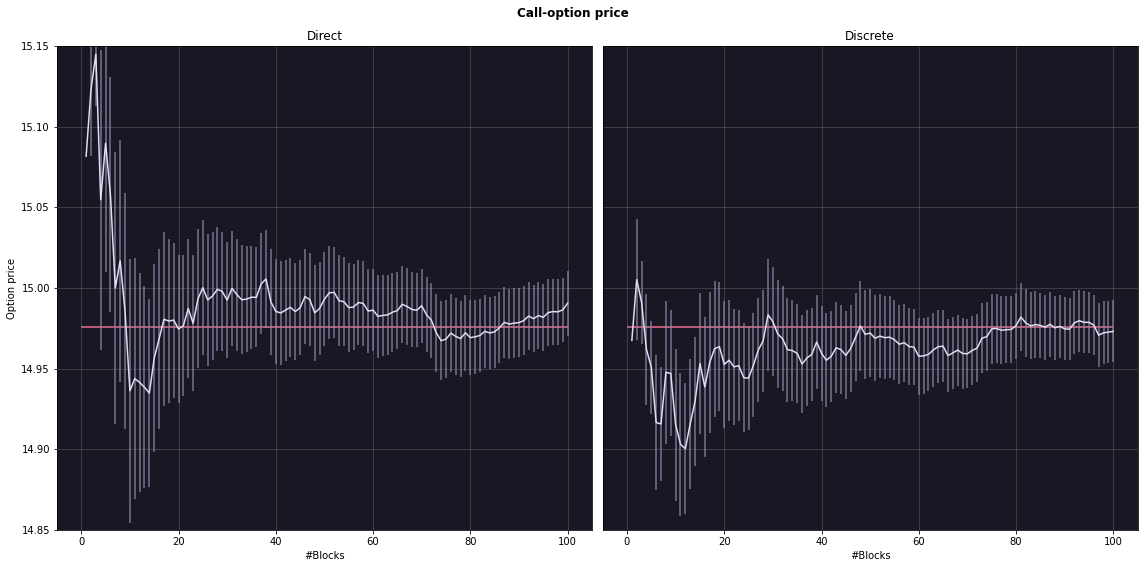

In [31]:
fig=plt.figure(figsize=(16, 8))
MultiplotSetup(fig,1,2)
plt.suptitle('Call-option price', weight='bold')

y_inf=14.85
y_sup=15.15
cop = 14.975790778311286

#direct 
plt.subplot(121)
plt.title("Direct")
plt.xlabel('#Blocks')
plt.ylabel('Option price')

data = np.genfromtxt("out/031-callopt_direct.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,2]
e=data[:,3]

plt.ylim(y_inf,y_sup)
plt.hlines(cop, 0,int(conf_db["N_BLOCKS"]),color=el3)
Errbar1Sigma(x,y,e)


#discrete 
plt.subplot(122)
plt.title("Discrete")
plt.tick_params(left=False,labelleft=False)
plt.xlabel('#Blocks')

data = np.genfromtxt("out/031-callopt_discrete.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,2]
e=data[:,3]

plt.ylim(y_inf,y_sup)
plt.hlines(cop, 0,int(conf_db["N_BLOCKS"]),color=el3)
Errbar1Sigma(x,y,e)

plt.tight_layout()

plt.show()

We have plotted the progressive averages for the estimated value of for the call-option price in function of the number of blocks and the value obtained using Black-Scholes theory. The error bars corresponds to $\sigma$ and $2\sigma$. As we can see, our estimation in compatible with the theoretical value.

### Put-option price

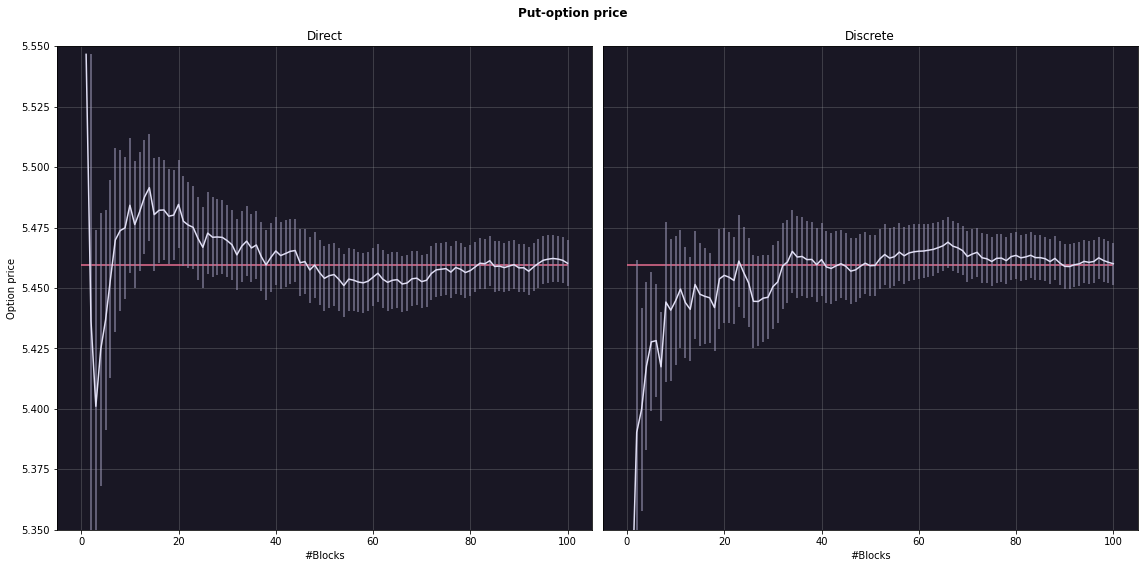

In [30]:
fig=plt.figure(figsize=(16, 8))
MultiplotSetup(fig,1,2)
plt.suptitle('Put-option price', weight='bold')

y_inf=5.35
y_sup=5.55
pop = 5.4595325819072364


#direct 
plt.subplot(121)
plt.title("Direct")
plt.xlabel('#Blocks')
plt.ylabel('Option price')

data = np.genfromtxt("out/031-putopt_direct.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,2]
e=data[:,3]

plt.ylim(y_inf,y_sup)
plt.hlines(pop, 0,int(conf_db["N_BLOCKS"]),color=el3)
Errbar1Sigma(x,y,e)

#discrete 
plt.subplot(122)
plt.title("Discrete")
plt.tick_params(left=False,labelleft=False)
plt.xlabel('#Blocks')

data = np.genfromtxt("out/031-putopt_discrete.csv", delimiter=",", skip_header=1)
x=data[:,0]
y=data[:,2]
e=data[:,3]

plt.ylim(y_inf,y_sup)
plt.hlines(pop, 0,int(conf_db["N_BLOCKS"]),color=el3)
Errbar1Sigma(x,y,e)

plt.tight_layout()


plt.show()

We have plotted the progressive averages for the estimated value of for the put-option price in function of the number of blocks and the value obtained using Black-Scholes theory. The error bars corresponds to $\sigma$. As we can see, our estimation in compatible with the theoretical value.